# 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

# 2. Load the data 
We are provided with the training and test datasets as below: \
Training: "olid-training-v1.0.tsv" is the original dataset which contains the tweets and their labels for each subtask. We will be using subtask_a and other columns are discarded here.\
Testing: "testset-levela.tsv" is the test set we will be using for testing our model. This dataset contains the tweets to test the model trained on subtask_a. This dataset doesn’t contain the labels for the tweets and is provided in a different file names "labels-levela.csv". 


In [2]:
train_tsv = pd.read_table('olid-training-v1.0.tsv', sep='\t',index_col=['id', 'tweet', 'subtask_a', 'subtask_b', 'subtask_c'])
train_tsv.head()

,,,,
id,tweet,subtask_a,subtask_b,subtask_c
86426,@USER She should ask a few native Americans what their take on this is.,OFF,UNT,NaN
90194,@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL,OFF,TIN,IND
16820,Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT,NOT,NaN,NaN
62688,"@USER Someone should'veTaken"" this piece of shit to a volcano. 😂""",OFF,UNT,NaN
43605,@USER @USER Obama wanted liberals &amp; illegals to move into red states,NOT,NaN,NaN


In [3]:
#Convert .tsv to .csv format
train_tsv.to_csv('train_csv',index=True)
print("Successfully made csv file")

Successfully made csv file


In [4]:
df = pd.read_csv('train_csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [6]:
#Remove the unwanted columns/variables
df1 = df.drop(['id','subtask_b','subtask_c'],axis=1)
df1

,tweet,subtask_a
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT
...,...,...
13235,@USER Sometimes I get strong vibes from people...,OFF
13236,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT
13237,@USER And why report this garbage. We don't g...,OFF
13238,@USER Pussy,OFF


In [7]:
df1.rename(columns=({'tweet':'tweet','subtask_a':'label'}),inplace=True)

In [8]:
df1.head()

,tweet,label
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   13240 non-null  object
 1   label   13240 non-null  object
dtypes: object(2)
memory usage: 207.0+ KB


In [10]:
train = df1
train.head()

,tweet,label
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [11]:
test1_tsv = pd.read_table('testset-levela.tsv',sep='\t')
test1_tsv.head()

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


In [12]:
test1_tsv.to_csv('test1_csv',index=False)
print("Successfully made csv file")

Successfully made csv file


In [13]:
test1 = pd.read_csv('test1_csv')
test1

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...
...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...
857,67018,3 people just unfollowed me for talking about ...
858,50665,#WednesdayWisdom Antifa calls the right fascis...


In [14]:
test2_csv = pd.read_csv('labels-levela.csv',header=None)
test2_csv.columns = ['id','label']
test2_csv

,id,label
0,15923,OFF
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,OFF
...,...,...
855,73439,OFF
856,25657,NOT
857,67018,OFF
858,50665,NOT


In [15]:
test_csv = pd.merge(test1,test2_csv,on='id', how='inner')
test_csv

,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [16]:
test = test_csv.drop('id', axis =1)
test

,tweet,label
0,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,#Watching #Boomer getting the news that she is...,NOT
4,#NoPasaran: Unity demo to oppose the far-right...,OFF
...,...,...
855,#DespicableDems lie again about rifles. Dem Di...,OFF
856,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
857,3 people just unfollowed me for talking about ...,OFF
858,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [17]:
train.head()

,tweet,label
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   13240 non-null  object
 1   label   13240 non-null  object
dtypes: object(2)
memory usage: 207.0+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   860 non-null    object
 1   label   860 non-null    object
dtypes: object(2)
memory usage: 20.2+ KB


# 3. Data preprocessing 

In [20]:
# Remove stopwords, @USER words, emojis, ...
#change the tweets into lower case
# tokenize the words

In [21]:
 from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [22]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [23]:
import preprocessor as p
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [24]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet
# compare the cleaned and uncleaned tweets
train.head()

,tweet,label,clean_tweet
0,@USER She should ask a few native Americans wh...,OFF,she should ask a few native americans what the...
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,go home youre drunk url
2,Amazon is investigating Chinese employees who ...,NOT,amazon is investigating chinese employees who ...
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,someone shouldvetaken this piece of shit to a ...
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,obama wanted liberals &amp illegals to move in...


In [25]:
train_tweet.head(10)

,0
0,she should ask a few native americans what the...
1,go home youre drunk url
2,amazon is investigating chinese employees who ...
3,someone shouldvetaken this piece of shit to a ...
4,obama wanted liberals &amp illegals to move in...
5,liberals are all kookoo
6,oh noes tough shit
7,was literally just talking about this lol all ...
8,buy more icecream
9,canada doesnt need another cuck we already hav...


In [26]:
# clean testing data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet
# compare the cleaned and uncleaned tweets
test.head()

,tweet,label,clean_tweet
0,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,democrats support antifa muslim brotherhood ms...
1,"#ConstitutionDay is revered by Conservatives, ...",NOT,is revered by conservatives hated by progressi...
2,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,first it reduces the ca url
3,#Watching #Boomer getting the news that she is...,NOT,getting the news that she is still up for paro...
4,#NoPasaran: Unity demo to oppose the far-right...,OFF,unity demo to oppose the far right in enough ...


In [27]:
test_tweet.head()

,0
0,democrats support antifa muslim brotherhood ms...
1,is revered by conservatives hated by progressi...
2,first it reduces the ca url
3,getting the news that she is still up for paro...
4,unity demo to oppose the far right in enough ...


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train = train['clean_tweet']
X_test = test['clean_tweet']
y_train = train['label'].replace(['NOT','OFF'],[0,1]).values
y_test = test['label'].replace(['NOT','OFF'],[0,1]).values

In [30]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [31]:
# Vectorize the tokens to convert into numerical form
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer(stop_words = 'english')

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)
print(f'The original text is:\n')
print(documents)
features = vectorizer.get_feature_names()
print(f'\nThe exctracted tokens are:\n')
print(features)
# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

The original text is:

["This is Import Data's Youtube channel", 'Data science is my passion and it is fun!', 'Please subscribe to my channel']

The exctracted tokens are:

['channel', 'data', 'fun', 'import', 'passion', 'science', 'subscribe', 'youtube']


,channel,data,fun,import,passion,science,subscribe,youtube
0,1,1,0,1,0,0,0,1
1,0,1,1,0,1,1,0,0
2,1,0,0,0,0,0,1,0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(X_train) + list(X_test))

# transform documents to document-term matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [34]:
X_train_vec.shape

(13240, 18864)

# 4. ML Classification Algorithms

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import RidgeClassifier

# 4.1. Logistic Regression

In [36]:
lr = LogisticRegression()
lr_fit = lr.fit(X_train_vec,y_train)
y_pred_lr = lr.predict(X_test_vec)
report = classification_report(y_test, y_pred_lr)
matrix = confusion_matrix(y_test,y_pred_lr)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc1=accuracy_score(y_test,y_pred_lr)

print("\n Logistic Regression, Accuracy Score:" , acc1)

Classification report
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       620
           1       0.74      0.44      0.55       240

    accuracy                           0.80       860
   macro avg       0.77      0.69      0.71       860
weighted avg       0.79      0.80      0.78       860

Confusion matrix 
 [[582  38]
 [134 106]]

 Logistic Regression, Accuracy Score: 0.8


/Users/anishaduwadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Logistic Regression - Grid Search

In [38]:
grid_params_lr = dict(
    solver=['newton-cg', 'liblinear'],
    penalty=['l2'],
    C=[10, 1.0, 0.1])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid=grid_params_lr, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_lr.fit(X_train_vec, y_train)

print("Logistic Regression, Grid search best parameters:", grid_search_lr.best_params_)

Logistic Regression, Grid search best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [39]:
grid_pred_lr = grid_search_lr.predict(X_test_vec)
report = classification_report(y_test, grid_pred_lr)
matrix = confusion_matrix(y_test,grid_pred_lr)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc1_g=accuracy_score(y_test,grid_pred_lr)

print("\n Logistic Regression Grid search, Accuracy Score:" , acc1_g)

Classification report
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       620
           1       0.74      0.44      0.55       240

    accuracy                           0.80       860
   macro avg       0.77      0.69      0.71       860
weighted avg       0.79      0.80      0.78       860

Confusion matrix 
 [[582  38]
 [134 106]]

 Logistic Regression Grid search, Accuracy Score: 0.8


# 4.2. Ridge Classifier

In [40]:
rc = RidgeClassifier()
rc_fit = rc.fit(X_train_vec,y_train)
y_pred_rc = rc.predict(X_test_vec)
report = classification_report(y_test, y_pred_rc)
matrix = confusion_matrix(y_test,y_pred_rc)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc2=accuracy_score(y_test,y_pred_rc)

print("\n Ridge Classifier, Accuracy Score:" , acc2)

Classification report
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       620
           1       0.63      0.46      0.53       240

    accuracy                           0.77       860
   macro avg       0.72      0.68      0.69       860
weighted avg       0.76      0.77      0.76       860

Confusion matrix 
 [[556  64]
 [130 110]]

 Ridge Classifier, Accuracy Score: 0.7744186046511627


In [41]:
# Ridge Classifier - Grid Search 

In [42]:
grid_params_rc = dict(alpha=[0.1, 0.2, 0.3, 0.4, 0.5])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search_rc = GridSearchCV(RidgeClassifier(), param_grid=grid_params_rc, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_rc.fit(X_train_vec, y_train)

print("Logistic Regression, Grid search best parameters:", grid_search_rc.best_params_)

Logistic Regression, Grid search best parameters: {'alpha': 0.5}


In [43]:
grid_pred_rc = grid_search_rc.predict(X_test_vec)
report = classification_report(y_test, grid_pred_rc)
matrix = confusion_matrix(y_test,grid_pred_rc)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc2_g=accuracy_score(y_test,grid_pred_rc)

print("\n Ridge Classifier Grid search, Accuracy Score:" , acc2_g)

Classification report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       620
           1       0.58      0.48      0.53       240

    accuracy                           0.76       860
   macro avg       0.70      0.67      0.68       860
weighted avg       0.75      0.76      0.75       860

Confusion matrix 
 [[538  82]
 [125 115]]

 Ridge Classifier Grid search, Accuracy Score: 0.7593023255813953


# 4.3. Support Vector Machine (SVM)

In [44]:
from sklearn import svm

svm = svm.SVC()
svm_fit = svm.fit(X_train_vec,y_train)
y_pred_svm = svm.predict(X_test_vec)
report = classification_report(y_test, y_pred_svm)
matrix = confusion_matrix(y_test,y_pred_svm)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc3=accuracy_score(y_test,y_pred_svm)

print("\n Support Vector Machine, Accuracy Score:" , acc3)

Classification report
               precision    recall  f1-score   support

           0       0.79      0.98      0.88       620
           1       0.89      0.33      0.48       240

    accuracy                           0.80       860
   macro avg       0.84      0.66      0.68       860
weighted avg       0.82      0.80      0.77       860

Confusion matrix 
 [[610  10]
 [160  80]]

 Support Vector Machine, Accuracy Score: 0.8023255813953488


In [45]:
# SVM - Grid Search

In [46]:
# defining parameter range
grid_param_svm = {'C': [0.1, 1, 10],
              'gamma': [ 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear' ]}                #'sigmoid',...
 
grid_search_svm = GridSearchCV(svm, grid_param_svm, refit = True, verbose = 3)
 
grid_search_svm.fit(X_train_vec, y_train)

print("SVM, Grid search best parameters:", grid_search_svm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  11.8s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  11.3s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  12.3s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  13.1s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=  12.0s
[CV 1/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   9.7s
[CV 2/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   9.1s
[CV 3/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   9.0s
[CV 4/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   8.9s
[CV 5/5] END ................C=0.1, gamma=0.1, kernel=linear; total time=   8.9s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=  10.0s
[CV 2/5] END ..................C=0.1, gamma=0.01

In [47]:
grid_pred_svm = grid_search_svm.predict(X_test_vec)
report = classification_report(y_test, grid_pred_svm)
matrix = confusion_matrix(y_test,grid_pred_svm)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc3_g=accuracy_score(y_test,grid_pred_svm)

print("\n SVM Grid search, Accuracy Score:" , acc3_g)

Classification report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       620
           1       0.77      0.45      0.57       240

    accuracy                           0.81       860
   macro avg       0.80      0.70      0.73       860
weighted avg       0.81      0.81      0.79       860

Confusion matrix 
 [[588  32]
 [131 109]]

 SVM Grid search, Accuracy Score: 0.8104651162790698


# 4.4. K Nearest Neighbors (K-NN)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_fit = knn.fit(X_train_vec, y_train)
y_pred_knn = knn.predict(X_test_vec)

report = classification_report(y_test, y_pred_knn)
matrix = confusion_matrix(y_test,y_pred_knn)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc4=accuracy_score(y_test,y_pred_knn)

print("\n K Nearest Neighbors, Accuracy Score:" , acc4)

Classification report
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       620
           1       0.82      0.11      0.20       240

    accuracy                           0.75       860
   macro avg       0.78      0.55      0.52       860
weighted avg       0.76      0.75      0.67       860

Confusion matrix 
 [[614   6]
 [213  27]]

 K Nearest Neighbors, Accuracy Score: 0.7453488372093023


In [49]:
# KNN - Grid Search

In [50]:
grid_params_knn = {
    'n_neighbors': [1, 3 , 5, 10],
    'leaf_size': [5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
                   
# with GridSearch
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    grid_params_knn,
    scoring = 'accuracy',
    n_jobs = -1)

grid_search_knn.fit(X_train_vec, y_train)

print("SVM, Grid search best parameters:", grid_search_knn.best_params_)

SVM, Grid search best parameters: {'leaf_size': 5, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [51]:
grid_pred_knn = grid_search_knn.predict(X_test_vec)
report = classification_report(y_test, grid_pred_knn)
matrix = confusion_matrix(y_test,grid_pred_knn)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc4_g=accuracy_score(y_test,grid_pred_knn)

print("\n K-NN Grid search, Accuracy Score:" , acc4_g)

Classification report
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       620
           1       0.83      0.17      0.28       240

    accuracy                           0.76       860
   macro avg       0.79      0.58      0.57       860
weighted avg       0.78      0.76      0.69       860

Confusion matrix 
 [[612   8]
 [200  40]]

 K-NN Grid search, Accuracy Score: 0.7581395348837209


# 4.5. Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2)
dtree.fit(X_train_vec,y_train)
y_pred_dtree = dtree.predict(X_test_vec)

report = classification_report(y_test, y_pred_dtree)
matrix = confusion_matrix(y_test,y_pred_dtree)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc5=accuracy_score(y_test,y_pred_dtree)

print("\n Decision Tree Classifier, Accuracy Score:" , acc5)

Classification report
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       620
           1       0.91      0.20      0.33       240

    accuracy                           0.77       860
   macro avg       0.83      0.60      0.59       860
weighted avg       0.80      0.77      0.71       860

Confusion matrix 
 [[615   5]
 [192  48]]

 Decision Tree Classifier, Accuracy Score: 0.7709302325581395


In [53]:
# Decision Tree - Grid Search

In [54]:
grid_params_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(1,10),
    'min_samples_leaf': range(1,5)
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(),
    grid_params_dt,
    n_jobs = -1
)

grid_search_dt.fit(X_train_vec, y_train)
print("Decision Tree, Grid search best parameters:", grid_search_dt.best_params_)


Decision Tree, Grid search best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 3}


/Users/anishaduwadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281
 0.68897281 0.68897281 0.68897281        nan 0.68897281 0.68897281
 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281
        nan 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281
 0.68897281 0.68897281 0.68897281        nan 0.68897281 0.68897281
 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281 0.68897281
        nan 0.69916918 0.69909366 0.69916918 0.69916918 0.69916918
 0.69909366 0.69916918 0.69909366        nan 0.69916918 0.69916918
 0.69916918 0.69909366 0.69916918 0.69916918 0.69916918 0.69916918
        nan 0.69856495 0.69856495 0.69864048 0.69864048 0.69856495
 0.69856495 0.69856495 0.69864048        nan 0.69879154 0.69871601
 0.69871601 0.69879154 0.69871601 0.69879154 0.69879154 0.69879154
        nan 0.70400302 0.70400302 

In [55]:
grid_pred_dt = grid_search_dt.predict(X_test_vec)
report = classification_report(y_test, grid_pred_dt)
matrix = confusion_matrix(y_test,grid_pred_dt)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc5_g=accuracy_score(y_test,grid_pred_dt)

print("\n Decision Tree Grid search, Accuracy Score:" , acc5_g)

Classification report
               precision    recall  f1-score   support

           0       0.77      0.99      0.87       620
           1       0.89      0.23      0.37       240

    accuracy                           0.78       860
   macro avg       0.83      0.61      0.62       860
weighted avg       0.80      0.78      0.73       860

Confusion matrix 
 [[613   7]
 [184  56]]

 Decision Tree Grid search, Accuracy Score: 0.7779069767441861


# 4.6. Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_fit = rf.fit(X_train_vec,y_train)
y_pred_rf = rf.predict(X_test_vec)

report = classification_report(y_test, y_pred_rf)
matrix = confusion_matrix(y_test,y_pred_rf)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc6=accuracy_score(y_test,y_pred_rf)

print("\n Random Forest Classifier, Accuracy Score:" , acc6)

Classification report
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       620
           1       0.81      0.44      0.57       240

    accuracy                           0.82       860
   macro avg       0.81      0.70      0.73       860
weighted avg       0.81      0.82      0.79       860

Confusion matrix 
 [[596  24]
 [135 105]]

 Random Forest Classifier, Accuracy Score: 0.8151162790697675


In [57]:
# Random Forest - Grid Search

In [58]:
grid_params_rfc = {
    'bootstrap': [True],
    'max_depth': [100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10]
}

grid_search_rfc = GridSearchCV(estimator = rf, param_grid = grid_params_rfc, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_rfc.fit(X_train_vec,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10]},
             verbose=2)

In [59]:
grid_pred_rfc = grid_search_rfc.predict(X_test_vec)
report = classification_report(y_test, grid_pred_rfc)
matrix = confusion_matrix(y_test,grid_pred_rfc)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc6_g=accuracy_score(y_test,grid_pred_rfc)

print("\n K-NN Grid search, Accuracy Score:" , acc6_g)

Classification report
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       620
           1       0.00      0.00      0.00       240

    accuracy                           0.72       860
   macro avg       0.36      0.50      0.42       860
weighted avg       0.52      0.72      0.60       860

Confusion matrix 
 [[620   0]
 [240   0]]

 K-NN Grid search, Accuracy Score: 0.7209302325581395


/Users/anishaduwadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishaduwadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anishaduwadi/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# 5. Comparison and Conclusion

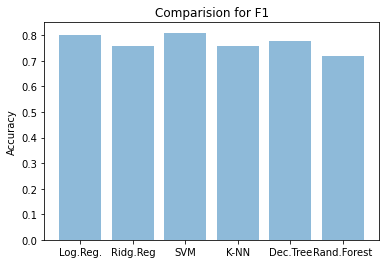

In [63]:
objects = ('Log.Reg.', 'Ridg.Reg','SVM','K-NN','Dec.Tree','Rand.Forest')
y_pos = np.arange(len(objects))
performance = [acc1_g,acc2_g,acc3_g,acc4_g,acc5_g,acc6_g]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparision for F1')
plt.show()

Hence, among all SVM and Logistic Regression have higher accuracy as compared to other ML algorithms. Tuning the range of the grid search parameters of above used ML algorithms and/or using other ML models could help to further improve the results.